In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [9]:
df = pd.read_csv('mushrooms.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [13]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [14]:
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

In [15]:
df.drop("veil-type",axis=1,inplace=True)

In [16]:
for column in df.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(df[column].unique())-1)
    for i in df[column].unique():
        df[column] = [value if letter == i else letter for letter in df[column]]
        value += step

In [18]:
data_check = df.head()
data_check = data_check.append(df.tail())
data_check

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000
8123,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,0.750,1.0,1.000000


In [19]:
y = df["class"].values    # "class" column as numpy array.
x = df.drop(["class"], axis=1).values    # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 97.05%


In [21]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [22]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 97.54%


In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.12%


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


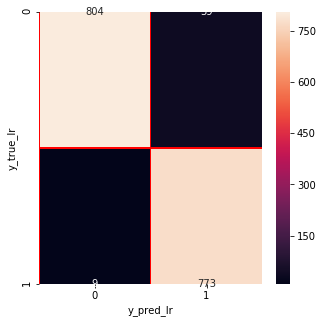

In [26]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

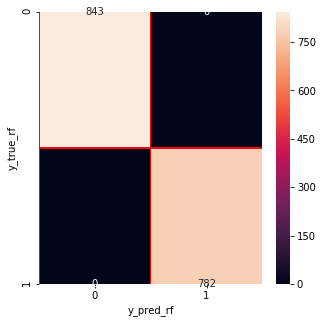

In [27]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

In [ ]:
# With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
# Most of classfication methods hit 100% accuracy with this dataset.